In [60]:
import os
import numpy as np
import scipy.io as sio
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [61]:
def loadData():
    data_path = os.path.join(os.getcwd(),'data')
    data = sio.loadmat(os.path.join(data_path, 'Indian_pines_corrected.mat'))['indian_pines_corrected']
    data_gt = sio.loadmat(os.path.join(data_path, 'Indian_pines_gt.mat'))['indian_pines_gt']    
    return data, data_gt

In [62]:
data, data_gt = loadData()

In [63]:
dataset_corrected = np.array(data)
dataset_gt = np.array(data_gt)
dataset_corrected = np.swapaxes(dataset_corrected, 0, 2)

In [64]:
dataset_corrected.shape

(200, 145, 145)

In [65]:
data = np.zeros(((dataset_gt.shape[1]**2), 200))
data_gt = np.zeros(((dataset_gt.shape[1]**2), 1))

for i in range((dataset_gt.shape[1])):
    for j in range((dataset_gt.shape[1])):
        data[i * (dataset_gt.shape[1]) + j] = dataset_corrected[:, i, j]
        data_gt[i * (dataset_gt.shape[1]) + j] = dataset_gt[i,j]     
        
data.shape

(21025, 200)

In [66]:
non_zeros = np.where(data_gt != 0)[0]

In [67]:
data = data[non_zeros]
data_gt = data_gt[non_zeros]

In [68]:
data.shape

(10249, 200)

In [69]:
data_gt.shape

(10249, 1)

In [70]:
X = data

In [71]:
# standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [72]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [73]:
# select first principal component (PC1)
X_pc1 = X_pca[:, 0]

In [74]:
unique_labels = np.unique(data_gt)

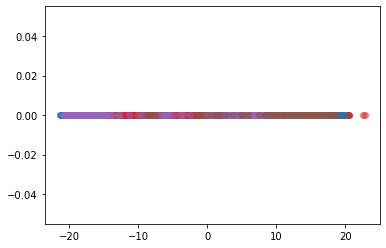

In [75]:
fig, ax = plt.subplots()
for label in unique_labels:
    label_indices = np.where(data_gt == label)[0]
    ax.scatter(X_pc1[label_indices], y=np.zeros_like(X_pc1[label_indices]), alpha=0.5)

plt.show()

# plt.scatter(X_pc1, y=np.zeros_like(X_pc1), alpha=0.5)
# plt.show()

In [76]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [77]:
# select PC1 and PC2
X_pc1 = X_pca[:, 0]
X_pc2 = X_pca[:, 1]

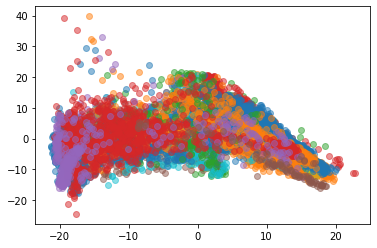

In [78]:
fig, ax = plt.subplots()
for label in unique_labels:
    label_indices = np.where(data_gt == label)[0]
    ax.scatter(X_pca[label_indices, 0], X_pca[label_indices, 1], alpha=0.5)

plt.show()

# plt.scatter(X_pc1, X_pc2, alpha=0.5)
# plt.show()

In [79]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

In [80]:
# select PC1, PC2, and PC3
X_pc1 = X_pca[:, 0]
X_pc2 = X_pca[:, 1]
X_pc3 = X_pca[:, 2]

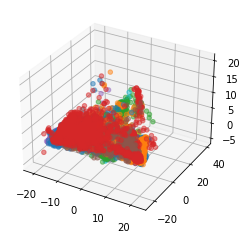

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:
    label_indices = np.where(data_gt == label)[0]
    ax.scatter(X_pca[label_indices, 0], X_pca[label_indices, 1], X_pca[label_indices, 2], alpha=0.5)

plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_pc1, X_pc2, X_pc3, alpha=0.5)
# plt.show()

C:\Users\Eylem\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


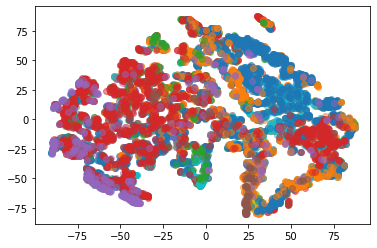

In [83]:
tsne = TSNE(n_components=2, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_pca)

fig, ax = plt.subplots()
for label in unique_labels:
    label_indices = np.where(data_gt == label)[0]
    ax.scatter(X_tsne[label_indices, 0], X_tsne[label_indices, 1], alpha=0.5)

plt.show()